<a href="https://colab.research.google.com/github/1101madan/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Exploratory Data Analysis:

data = pd.read_csv('https://raw.githubusercontent.com/1101madan/PCA/main/wine.csv',delimiter=',')


---
## EDA
---

In [5]:
data.head()


Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.isnull().sum()


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
data.duplicated().sum()


0

In [9]:
np.round(data.describe().T,2)


count    mean     std     min     25%     50%     75%  \
Type             178.0    1.94    0.78    1.00    1.00    2.00    3.00   
Alcohol          178.0   13.00    0.81   11.03   12.36   13.05   13.68   
Malic            178.0    2.34    1.12    0.74    1.60    1.87    3.08   
Ash              178.0    2.37    0.27    1.36    2.21    2.36    2.56   
Alcalinity       178.0   19.49    3.34   10.60   17.20   19.50   21.50   
Magnesium        178.0   99.74   14.28   70.00   88.00   98.00  107.00   
Phenols          178.0    2.30    0.63    0.98    1.74    2.36    2.80   
Flavanoids       178.0    2.03    1.00    0.34    1.20    2.13    2.88   
Nonflavanoids    178.0    0.36    0.12    0.13    0.27    0.34    0.44   
Proanthocyanins  178.0    1.59    0.57    0.41    1.25    1.56    1.95   
Color            178.0    5.06    2.32    1.28    3.22    4.69    6.20   
Hue              178.0    0.96    0.23    0.48    0.78    0.96    1.12   
Dilution         178.0    2.61    0.71    1.27    1.94    2.78    3.17   
Proline          178.0  746.89  314.91  278.00  500.50  673.50  985.00   

                     max  
Type                3.00  
Alcohol            14.83  
Malic               5.80  
Ash                 3.23  
Alcalinity         30.00  
Magnesium         162.00  
Phenols             3.88  
Flavanoids          5.08  
Nonflavanoids       0.66  
Proanthocyanins     3.58  
Color              13.00  
Hue                 1.71  
Dilution            4.00  
Proline          1680.00

#### Analyzing the Distribution of the data

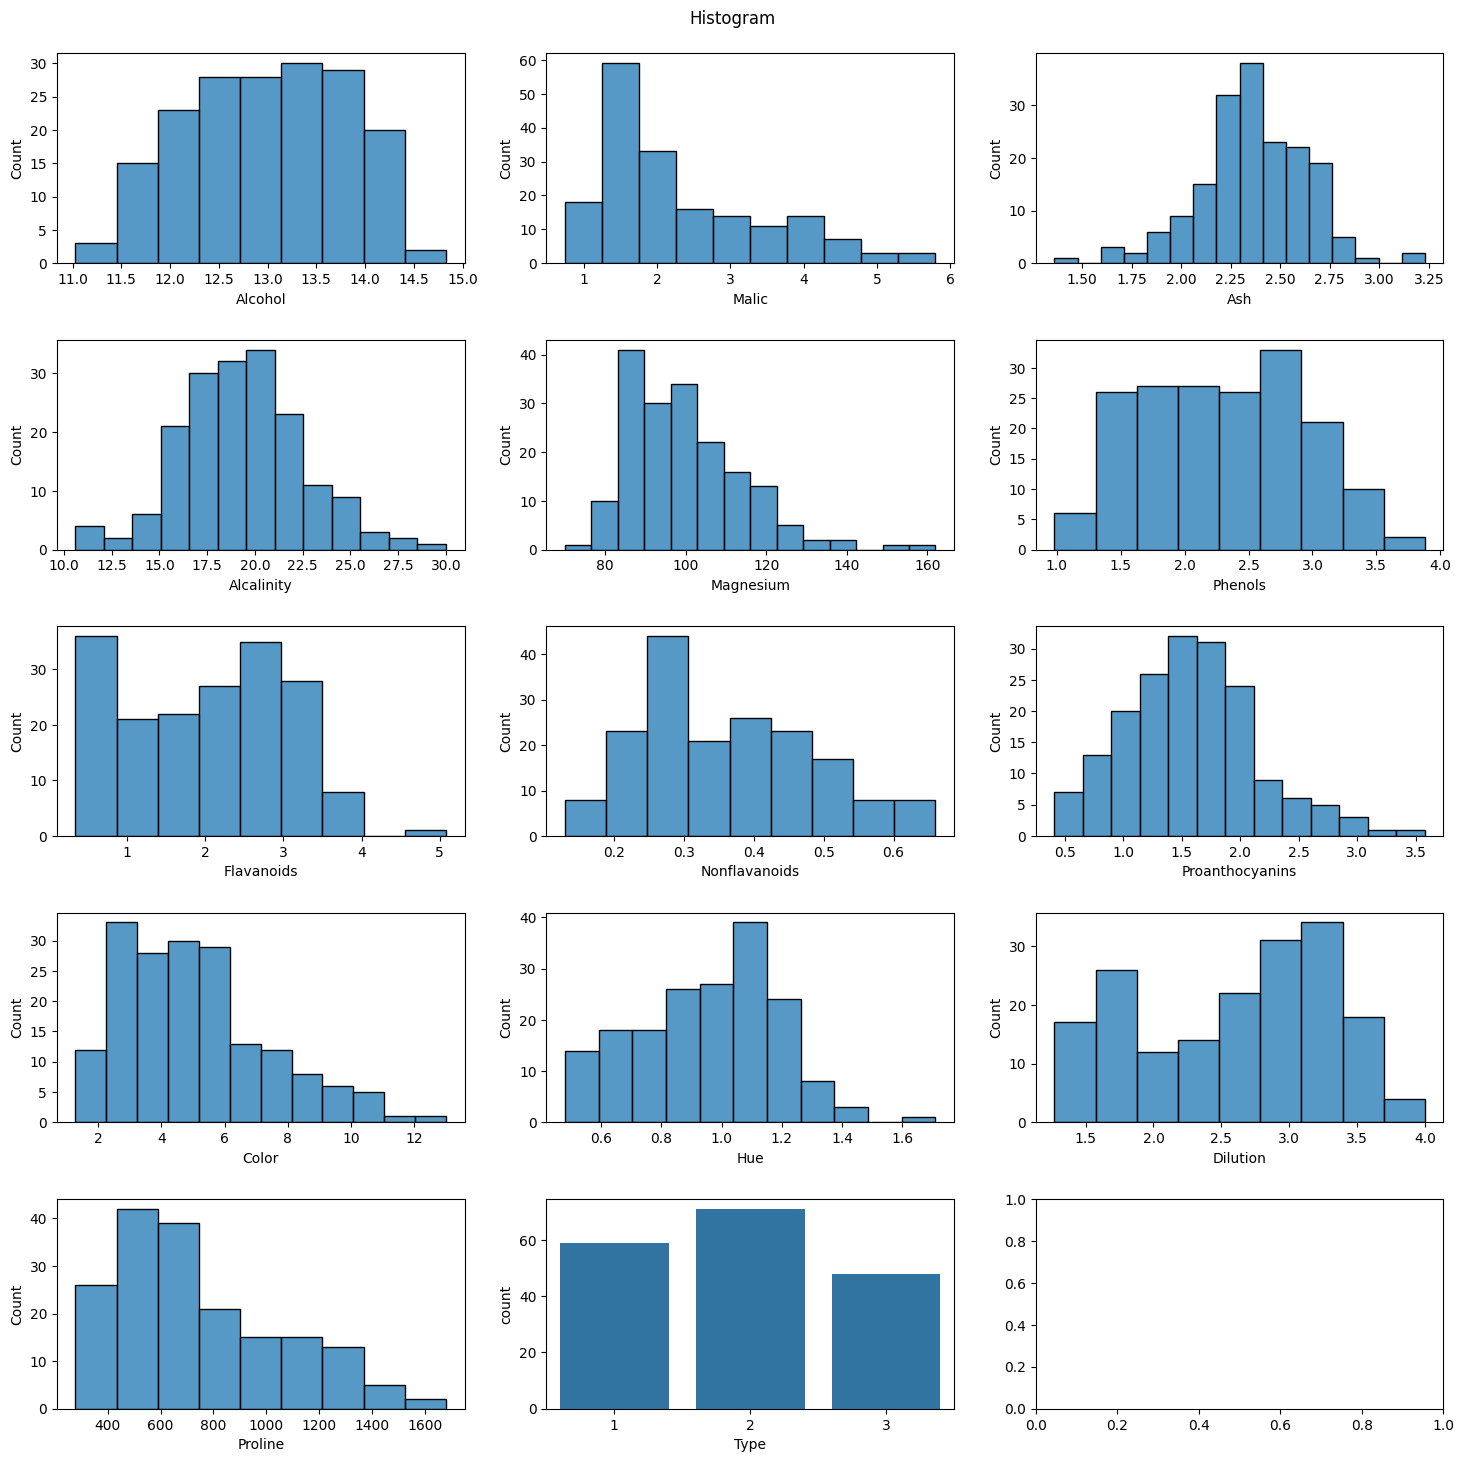

In [10]:
fig,ax = plt.subplots(5,3,figsize=(15,15))
plt.suptitle('Histogram')
sns.histplot(data=data, x='Alcohol', ax=ax[0, 0])
sns.histplot(data=data, x='Malic', ax=ax[0, 1])
sns.histplot(data=data, x='Ash', ax=ax[0, 2])
sns.histplot(data=data, x='Alcalinity', ax=ax[1, 0])
sns.histplot(data=data, x='Magnesium', ax=ax[1, 1])
sns.histplot(data=data, x='Phenols', ax=ax[1, 2])
sns.histplot(data=data, x='Flavanoids', ax=ax[2, 0])
sns.histplot(data=data, x='Nonflavanoids', ax=ax[2, 1])
sns.histplot(data=data, x='Proanthocyanins', ax=ax[2, 2])
sns.histplot(data=data, x='Color', ax=ax[3, 0])
sns.histplot(data=data, x='Hue', ax=ax[3, 1])
sns.histplot(data=data, x='Dilution', ax=ax[3, 2])
sns.histplot(data=data, x='Proline', ax=ax[4, 0])
sns.countplot(data=data,x='Type',ax=ax[4,1])

plt.tight_layout(pad=2.0)
plt.show()

In [11]:
fig, ax = plt.subplots(13, 1, figsize=(10, 20))
plt.suptitle('BOXPLOTS')
sns.boxplot(data=data, x='Alcohol',hue='Type',palette='bright', ax=ax[0])
sns.boxplot(data=data, x='Malic',hue='Type',palette='bright', ax=ax[1])
sns.boxplot(data=data, x='Ash',hue='Type',palette='bright', ax=ax[2])
sns.boxplot(data=data, x='Alcalinity',hue='Type',palette='bright', ax=ax[3])
sns.boxplot(data=data, x='Magnesium',hue='Type',palette='bright', ax=ax[4])
sns.boxplot(data=data, x='Phenols',hue='Type',palette='bright', ax=ax[5])
sns.boxplot(data=data, x='Flavanoids',hue='Type',palette='bright', ax=ax[6])
sns.boxplot(data=data, x='Nonflavanoids',hue='Type',palette='bright', ax=ax[7])
sns.boxplot(data=data, x='Proanthocyanins',hue='Type',palette='bright', ax=ax[8])
sns.boxplot(data=data, x='Color',hue='Type' ,palette='bright', ax=ax[9])
sns.boxplot(data=data, x='Hue',hue='Type',palette='bright', ax=ax[10])
sns.boxplot(data=data, x='Dilution',hue='Type',palette='bright', ax=ax[11])
sns.boxplot(data=data, x='Proline', hue='Type',palette='bright', ax=ax[12])
plt.tight_layout(pad=2.0)
plt.show()

In [12]:
fig,ax = plt.subplots(5,3,figsize=(15,15))
plt.suptitle('Histogram')
sns.kdeplot(data=data, x='Alcohol', ax=ax[0, 0])
sns.kdeplot(data=data, x='Malic', ax=ax[0, 1])
sns.kdeplot(data=data, x='Ash', ax=ax[0, 2])
sns.kdeplot(data=data, x='Alcalinity', ax=ax[1, 0])
sns.kdeplot(data=data, x='Magnesium', ax=ax[1, 1])
sns.kdeplot(data=data, x='Phenols', ax=ax[1, 2])
sns.kdeplot(data=data, x='Flavanoids', ax=ax[2, 0])
sns.kdeplot(data=data, x='Nonflavanoids', ax=ax[2, 1])
sns.kdeplot(data=data, x='Proanthocyanins', ax=ax[2, 2])
sns.kdeplot(data=data, x='Color', ax=ax[3, 0])
sns.kdeplot(data=data, x='Hue', ax=ax[3, 1])
sns.kdeplot(data=data, x='Dilution', ax=ax[3, 2])
sns.kdeplot(data=data, x='Proline', ax=ax[4, 0])
plt.tight_layout(pad=2.0)
plt.show()

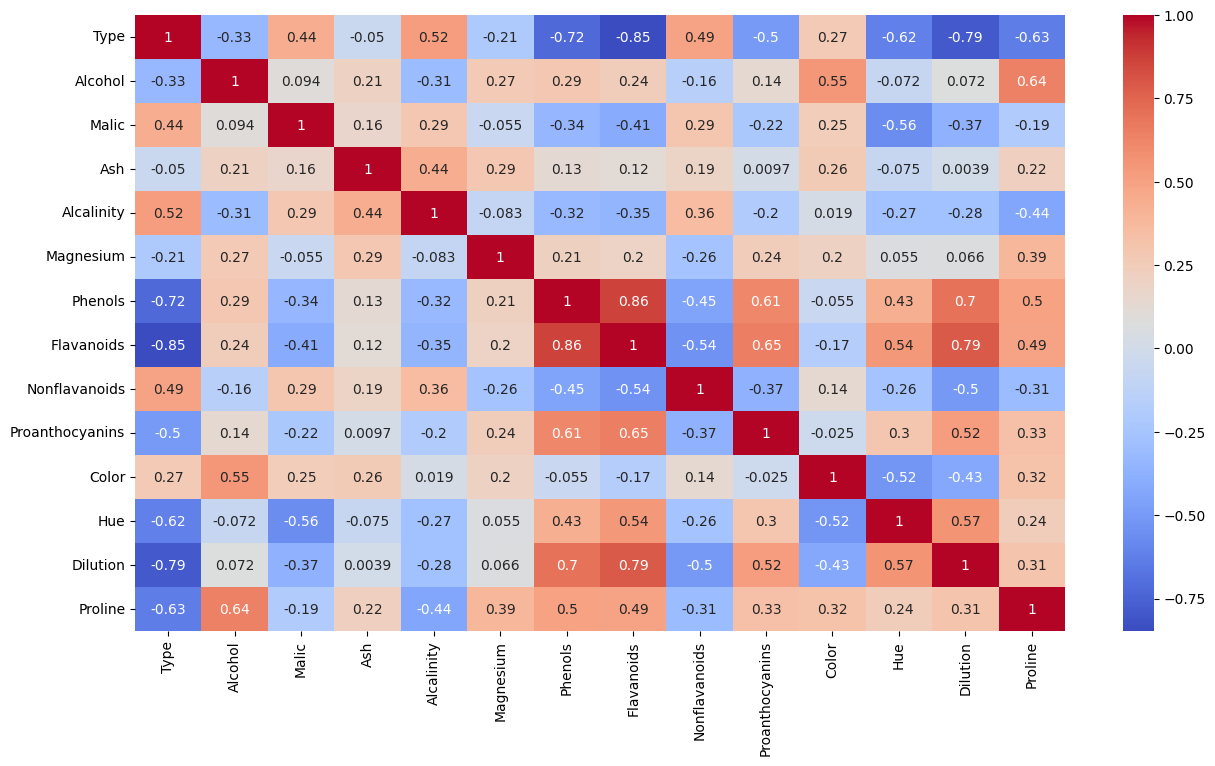

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

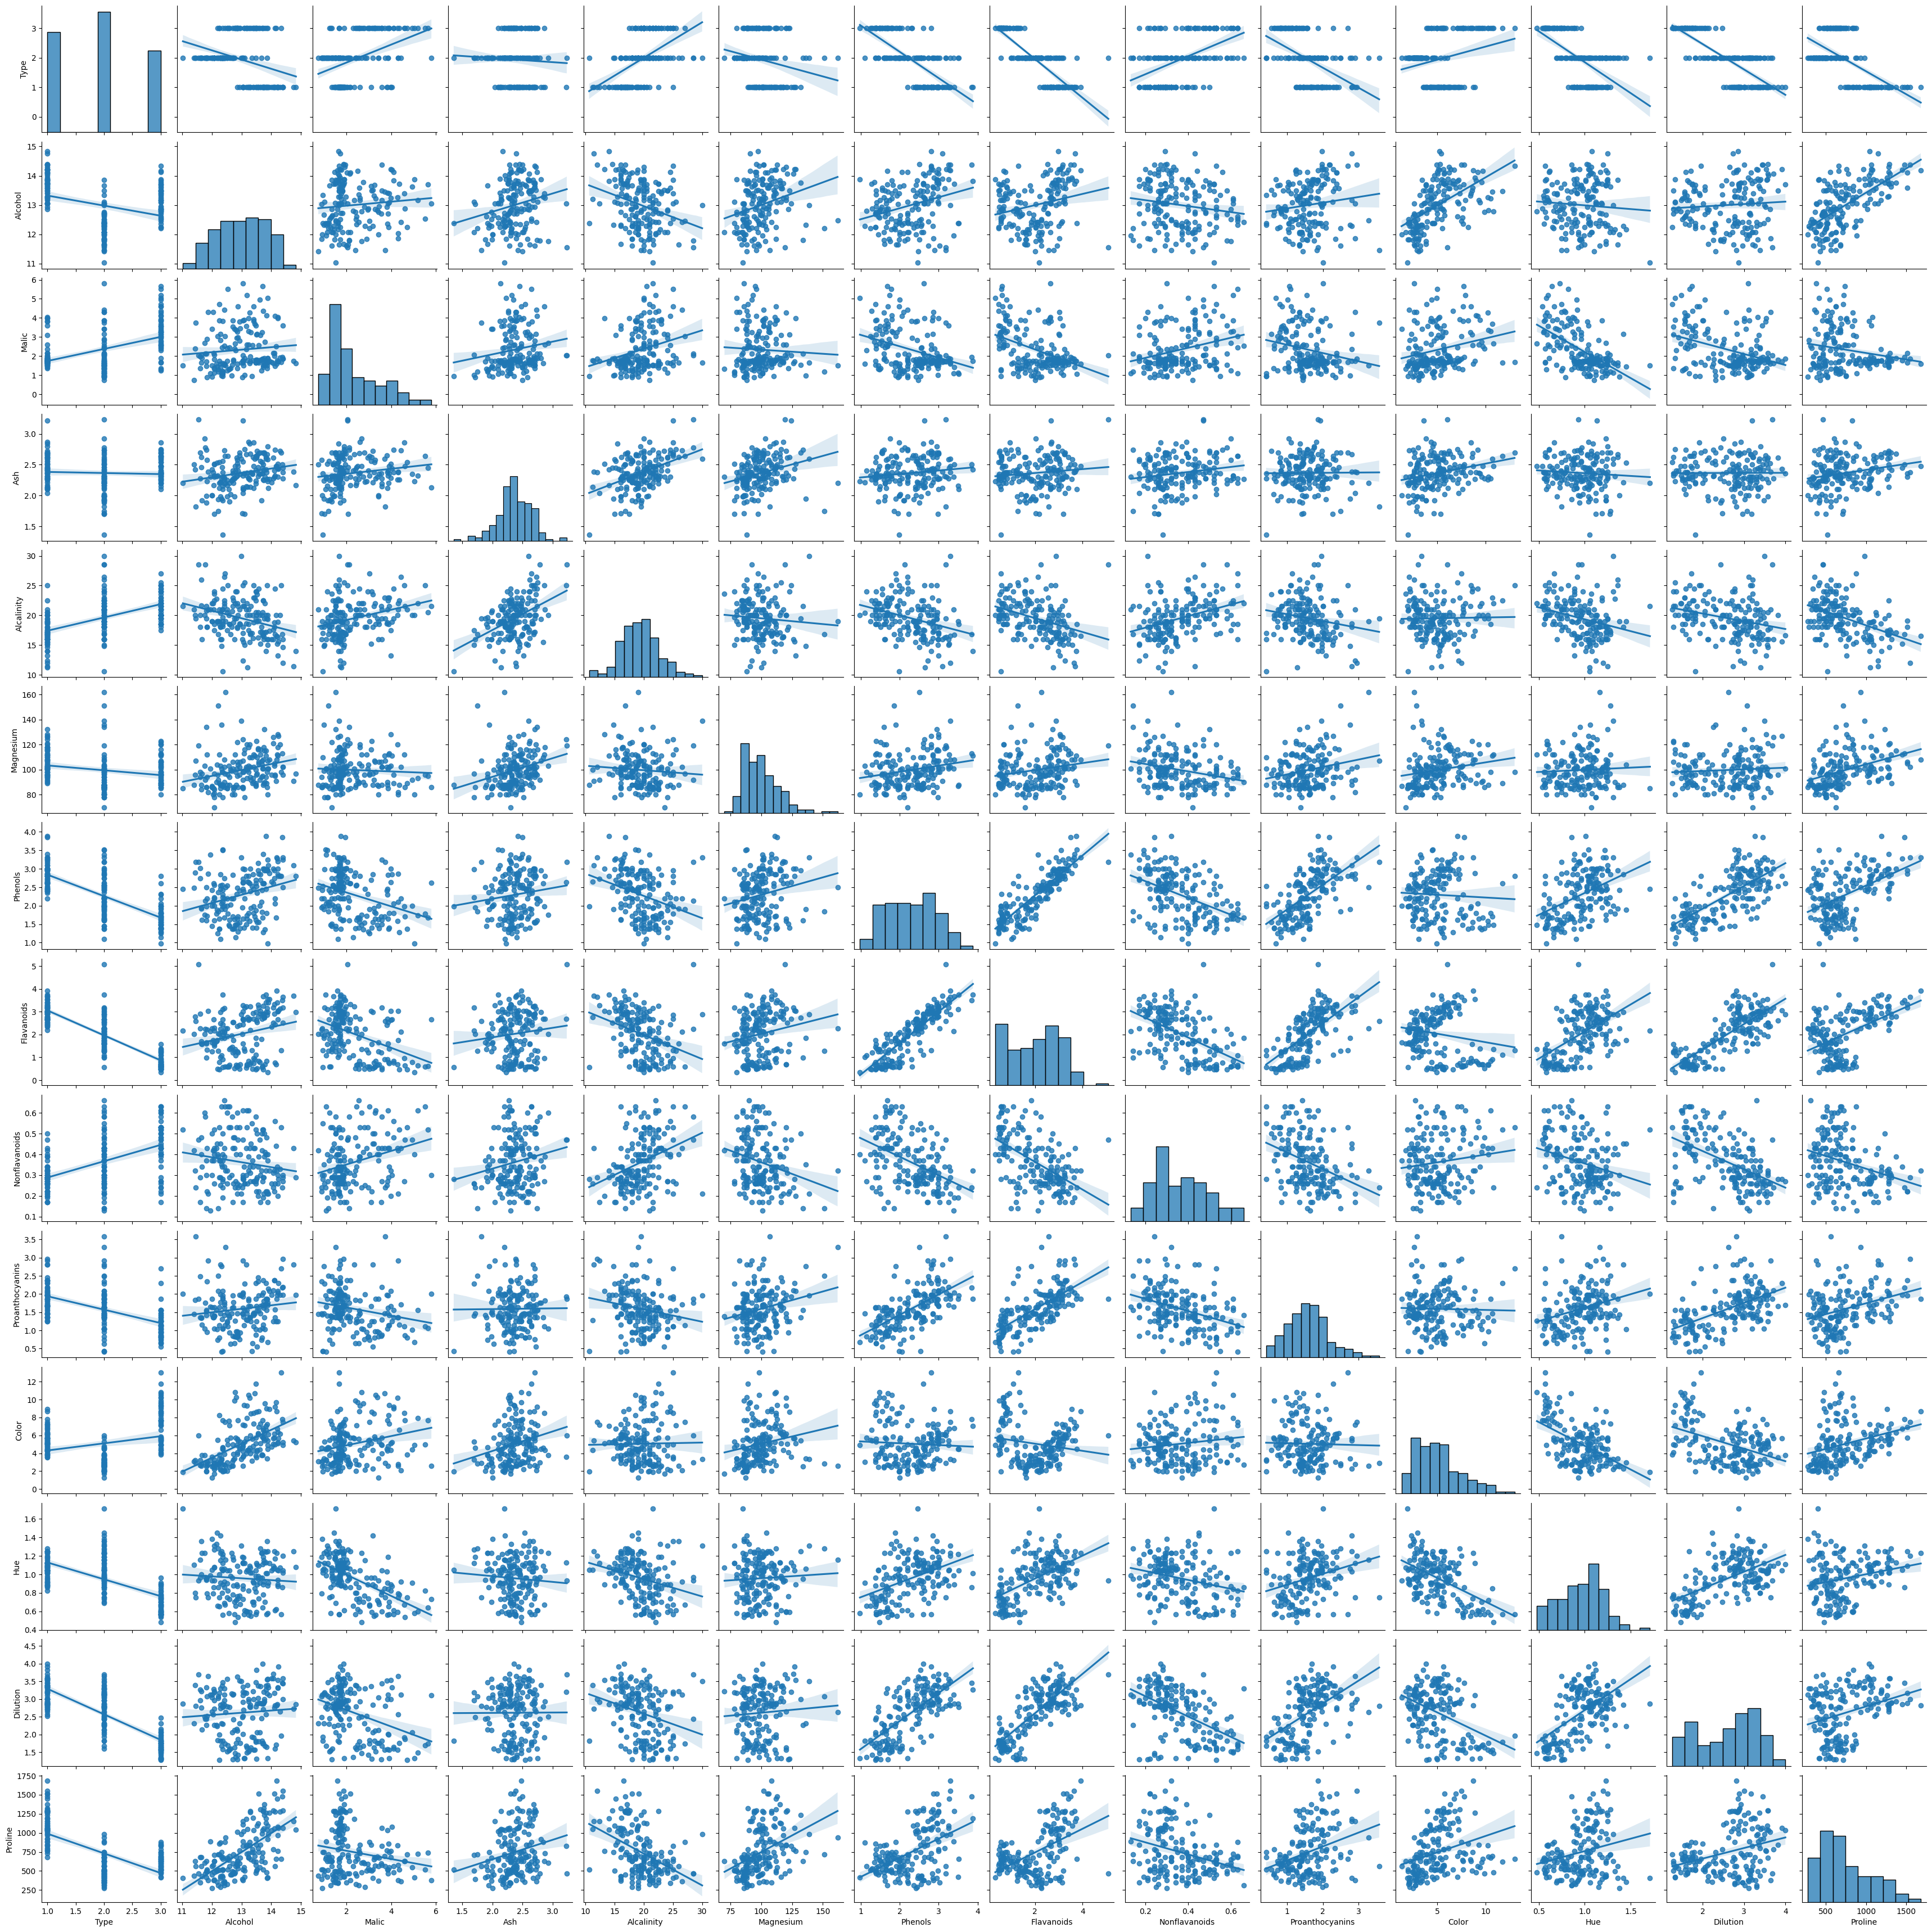

In [17]:
sns.pairplot(data,kind='reg')

#### Preprocessing the data

In [12]:
# Dropping Type column as it does not have any useful info.
data1 = data.drop(columns='Type',axis=1)

In [13]:
# Standardizing the values so that the data is compareable with each other.
from sklearn.preprocessing import StandardScaler

In [14]:
scaler_data = StandardScaler().fit_transform(data1)

In [15]:
scaler_data = pd.DataFrame(scaler_data,columns=data1.columns)

---
## PCA
---

In [16]:
# Importing and Initilizing PCA instance
from sklearn.decomposition import PCA
pca= PCA()

In [17]:
pca_values = pca.fit_transform(scaler_data)

In [18]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [20]:
pca_var = np.round(pca.explained_variance_ratio_,2)

In [21]:
pca_var

array([0.36, 0.19, 0.11, 0.07, 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02,
       0.01, 0.01])

In [22]:
(pca_var[0]+pca_var[1])*100

55.00000000000001

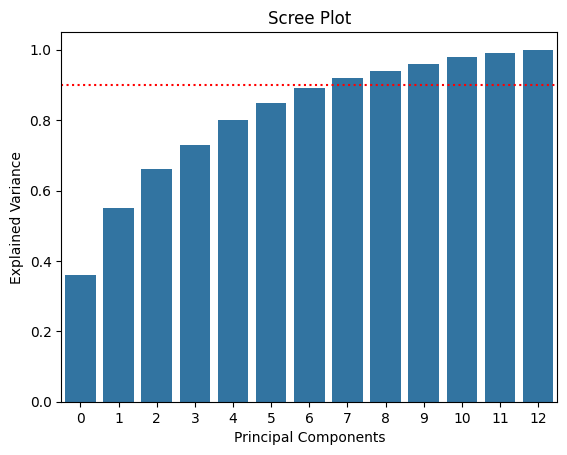

In [23]:
sns.barplot(np.cumsum(pca_var))
plt.axhline(y=0.90,color='red',linestyle=':')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [24]:
pca_values_df = pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2'])

In [25]:
pca_values_df = pd.concat([pca_values_df,data['Type']],axis=1)

In [26]:
pca_values_df.head()

PC1       PC2  Type
0  3.316751 -1.443463     1
1  2.209465  0.333393     1
2  2.516740 -1.031151     1
3  3.757066 -2.756372     1
4  1.008908 -0.869831     1

In [27]:
sns.scatterplot(data=pca_values_df,hue='Type',x='PC1',y='PC2',palette='bright')
plt.title('PCA Plot')

Text(0.5, 1.0, 'PCA Plot')

---
## KMeans Clustering - orignal data
---

In [28]:
from sklearn.cluster import KMeans


In [29]:
#scaled data (data1) of  orignal Dataset (no categorical data)
scaled_kmeans_df = scaler_data.copy()
scaled_kmeans_df.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874

In [30]:
wcss = []
for i in range(1,13):
  #n_clusters = n+1
  kmeans_model = KMeans(n_clusters=i).fit(scaled_kmeans_df)
  wcss.append(kmeans_model.inertia_)

In [31]:
plt.plot(range(1,13),wcss)
plt.xticks(range(1,13))
plt.title('KMeans Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=3,color='red',linestyle=':')
plt.show()

> k=3 can be considered as optimal value as 3 onwards the reduction in within cluster sum of squared distances become  minimal

In [32]:
model_kmeans = KMeans(n_clusters=3)

In [33]:
model_kmeans.fit(scaled_kmeans_df)

KMeans(n_clusters=3)

In [34]:
scaled_kmeans_df

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 13 columns]

In [35]:
km_clusters= model_kmeans.predict(scaled_kmeans_df)


In [36]:
clusters_df = pd.DataFrame(km_clusters,columns=['Cluster Labels'])
clusters_df.head()

Cluster Labels
0               2
1               2
2               2
3               2
4               2

In [37]:
model_kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [38]:
model_kmeans.inertia_

1277.928488844643

In [39]:
clusters_df.value_counts()

Cluster Labels
0                 65
2                 62
1                 51
Name: count, dtype: int64

In [40]:
scaled_kmeans_df_clustered = pd.concat([scaled_kmeans_df,clusters_df],axis=1)

In [41]:
scaled_kmeans_df_clustered.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  \
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009   
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242   
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148   
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574   
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874   

   Cluster Labels  
0               2  
1               2  
2               2  
3               2  
4               2

In [42]:
sns.scatterplot(data=scaled_kmeans_df_clustered,x='Alcohol',y='Malic',hue='Cluster Labels',palette='bright')

<Axes: xlabel='Alcohol', ylabel='Malic'>

---
## KMeans Clustering - PCA Data
---

In [43]:
pca_values_clustering = pd.DataFrame(pca_values,columns=data1.columns)

In [44]:
pca_values_clustering.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  3.316751 -1.443463 -0.165739   -0.215631   0.693043 -0.223880    0.596427   
1  2.209465  0.333393 -2.026457   -0.291358  -0.257655 -0.927120    0.053776   
2  2.516740 -1.031151  0.982819    0.724902  -0.251033  0.549276    0.424205   
3  3.757066 -2.756372 -0.176192    0.567983  -0.311842  0.114431   -0.383337   
4  1.008908 -0.869831  2.026688   -0.409766   0.298458 -0.406520    0.444074   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0       0.065139         0.641443  1.020956 -0.451563  0.540810 -0.066239  
1       1.024416        -0.308847  0.159701 -0.142657  0.388238  0.003637  
2      -0.344216        -1.177834  0.113361 -0.286673  0.000584  0.021717  
3       0.643593         0.052544  0.239413  0.759584 -0.242020 -0.369484  
4       0.416700         0.326819 -0.078366 -0.525945 -0.216664 -0.079364

In [45]:
wcss_pca_data = []
for i in range(1,13):
  kmeans_pca_data_model=KMeans(n_clusters=i).fit(pca_values_clustering)
  wcss_pca_data.append(kmeans_pca_data_model.inertia_)

In [46]:
plt.plot(range(1,13),wcss_pca_data)
plt.axvline(x=3,color='red',linestyle=':')
plt.xticks(range(1,13))
plt.title('KMeans Elbow curve for PCA Transformed data')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

> k=3 can be considered as optimal value as 3 onwards the reduction in within cluster sum of squared distances become  minimal

In [47]:
model_km_pca_data = KMeans(n_clusters=3)


In [48]:
model_km_pca_data.fit(pca_values_clustering)

KMeans(n_clusters=3)

In [49]:
km_pca_data_clusters =model_km_pca_data.predict(pca_values_clustering)
km_pca_data_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [50]:
km_pca_data_clusters = pd.DataFrame(km_pca_data_clusters,columns=['Cluster Labels'])

In [51]:
km_pca_data_clusters

Cluster Labels
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
173               2
174               2
175               2
176               2
177               2

[178 rows x 1 columns]

In [52]:
pca_data_df = pd.concat([pca_values_clustering,km_pca_data_clusters],axis=1)

In [53]:
pca_data_df.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  3.316751 -1.443463 -0.165739   -0.215631   0.693043 -0.223880    0.596427   
1  2.209465  0.333393 -2.026457   -0.291358  -0.257655 -0.927120    0.053776   
2  2.516740 -1.031151  0.982819    0.724902  -0.251033  0.549276    0.424205   
3  3.757066 -2.756372 -0.176192    0.567983  -0.311842  0.114431   -0.383337   
4  1.008908 -0.869831  2.026688   -0.409766   0.298458 -0.406520    0.444074   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  \
0       0.065139         0.641443  1.020956 -0.451563  0.540810 -0.066239   
1       1.024416        -0.308847  0.159701 -0.142657  0.388238  0.003637   
2      -0.344216        -1.177834  0.113361 -0.286673  0.000584  0.021717   
3       0.643593         0.052544  0.239413  0.759584 -0.242020 -0.369484   
4       0.416700         0.326819 -0.078366 -0.525945 -0.216664 -0.079364   

   Cluster Labels  
0               1  
1               1  
2               1  
3               1  
4               1

In [54]:
sns.scatterplot(data =pca_data_df, x='Alcohol',y='Malic',hue='Cluster Labels',palette='bright')

<Axes: xlabel='Alcohol', ylabel='Malic'>

---
## KMeans Comparison
---

* In the analysis that was conducted, PCA was used to reduce the number of features in the wine dataset from 13 to 2. This made it easier to visualize the data and to perform KMeans clustering.
* PCA Should be used when you have a dataset with a large number of features and you want to reduce the number of features to improve the performance of machine learning algorithms or to make it easier to visualize the data.
* KMeans clustering can be used to group data points into clusters. This can be useful for a variety of reasons, such as identifying different types of customers or understanding the underlying structure of a dataset.
* It was observed that PCA can improve clustering results by reducing noise and highlighting relevant patterns.
Clustering on PCA-transformed data can be more efficient and effective.

In [55]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
plt.suptitle('KMEANS CLUSTERING COMPARISON')
plt.tight_layout()
sns.scatterplot(data=scaled_kmeans_df_clustered,x='Alcohol',y='Malic',hue='Cluster Labels',palette='bright',ax=axs[0])
axs[0].set_title('KMeans - Orignal Data')
sns.scatterplot(data =pca_data_df, x='Alcohol',y='Malic',hue='Cluster Labels',palette='bright',ax=axs[1])
axs[1].set_title('KMeans - PCA transformed Data')
plt.show()

> ###  We can see that the PCA- Transformed data has better clustering as compared to KMeans Clustering data.

Clustering results from the original data are less organized than the PCA-transformed data. This is because the original data has more dimensions, which can make it more difficult to find clear clusters. PCA can help to improve clustering results by reducing the number of dimensions and highlighting the most important patterns in the data.

* But using PCA can lead to loss of information compared to KMeans clustering.
* PCA will reduce the dimentions and make it easier to visulaize clearer clusters.

In [ ]:
* PCA can be used when there is Liner data